In [ ]:
import pandas as pd
import requests
import numpy as np
# from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import keras
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [ ]:
res = requests.get("https://ai-emp-fog-comp.herokuapp.com/raw-data")
response = res.json()

In [ ]:
df = pd.DataFrame.from_dict(response["raw_data"])
df.head()

,timestep_time,vehicle_1_position,vehicle_2_position,vehicle_3_position,vehicle_4_position,vehicle_5_position,vehicle_6_position,vehicle_7_position,vehicle_8_position,vehicle_9_position,vehicle_10_position,vehicle_11_position,vehicle_12_position,vehicle_13_position,vehicle_14_position,vehicle_15_position,vehicle_16_position,vehicle_17_position,vehicle_1_speed,vehicle_2_speed,vehicle_3_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed,vehicle_9_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed
0,54,643.23,362.75,186.78,99.19,55.45,30.70,18.04,5.10,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,12.13,6.92,11.54,6.16,6.93,4.33,5.77,0.00,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55
1,55,655.90,370.55,199.25,103.51,61.61,36.01,24.82,6.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,12.66,7.80,12.47,4.32,6.16,5.32,6.78,1.45,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88
2,56,668.23,378.11,211.16,107.05,67.78,40.62,32.47,9.50,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21,12.33,7.56,11.91,3.54,6.17,4.61,7.65,2.94,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77
3,57,679.96,385.32,223.58,110.50,75.01,45.28,39.39,15.02,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95,11.73,7.21,12.41,3.44,7.24,4.65,6.92,5.52,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75
4,58,692.82,393.16,235.65,113.74,81.46,49.98,46.90,22.57,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81,12.86,7.84,12.07,3.24,6.45,4.71,7.51,7.55,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86


In [ ]:
s1=df["vehicle_1_position"]

In [ ]:
df.describe()

,timestep_time,vehicle_1_position,vehicle_2_position,vehicle_3_position,vehicle_4_position,vehicle_5_position,vehicle_6_position,vehicle_7_position,vehicle_8_position,vehicle_9_position,vehicle_10_position,vehicle_11_position,vehicle_12_position,vehicle_13_position,vehicle_14_position,vehicle_15_position,vehicle_16_position,vehicle_17_position,vehicle_1_speed,vehicle_2_speed,vehicle_3_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed,vehicle_9_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,789.000000,9734.277954,5687.040945,8886.484432,6959.828674,5011.999538,3506.565425,5443.410000,5255.171319,8037.725221,10347.356669,8607.660897,2145.438973,9026.047573,3888.386451,5520.753861,2939.884405,8250.095037,12.374956,7.246553,11.830252,9.401815,6.755588,4.737838,7.386186,7.150102,10.288654,13.321550,11.115581,2.761788,11.768749,5.056200,7.240054,3.855003,10.953759
std,424.785436,5256.679260,3078.252727,5022.238924,4022.732047,2873.898429,2014.247857,3135.889069,3045.495499,4373.437348,5661.316425,4722.589883,1172.978019,5001.275834,2148.149805,3073.598447,1636.909954,4651.406503,0.384279,0.370072,0.372876,0.761194,0.396062,0.378423,0.384922,0.469475,0.373903,0.381581,0.374785,0.371155,0.394379,0.371395,0.383736,0.374395,0.378313
min,54.000000,643.230000,362.750000,186.780000,99.190000,55.450000,30.700000,18.040000,5.100000,476.040000,551.590000,441.710000,113.180000,383.100000,167.000000,203.390000,104.060000,200.550000,11.640000,6.610000,10.560000,1.890000,4.520000,2.610000,5.770000,0.000000,9.470000,11.380000,9.620000,2.110000,9.630000,4.180000,6.590000,3.190000,9.750000
25%,421.500000,5188.385000,3028.210000,4544.200000,3480.800000,2524.810000,1762.970000,2734.670000,2618.240000,4258.225000,5446.580000,4517.650000,1132.315000,4697.655000,2031.300000,2861.155000,1528.430000,4229.805000,12.030000,6.930000,11.520000,9.130000,6.430000,4.425000,7.050000,6.850000,9.960000,13.010000,10.805000,2.440000,11.450000,4.740000,6.900000,3.530000,10.620000
50%,789.000000,9735.280000,5681.290000,8891.780000,6954.770000,5006.440000,3507.020000,5441.300000,5253.190000,8035.680000,10349.350000,8605.820000,2146.090000,9025.000000,3896.300000,5519.550000,2935.610000,8247.960000,12.380000,7.250000,11.820000,9.470000,6.760000,4.710000,7.390000,7.150000,10.290000,13.340000,11.110000,2.760000,11.770000,5.060000,7.240000,3.870000,10.960000
75%,1156.500000,14280.150000,8351.420000,13232.105000,10442.935000,7500.500000,5252.265000,8152.670000,7893.910000,11821.135000,15242.630000,12691.955000,3163.605000,13352.910000,5745.280000,8177.865000,4360.665000,12270.120000,12.715000,7.560000,12.160000,9.800000,7.090000,5.070000,7.720000,7.500000,10.620000,13.630000,11.430000,3.080000,12.110000,5.370000,7.580000,4.180000,11.280000
max,1524.000000,18834.730000,11015.410000,17577.550000,13923.000000,9985.920000,6995.620000,10877.350000,10522.870000,15600.910000,20134.590000,16781.600000,4172.850000,17682.900000,7599.820000,10846.830000,5771.030000,16302.910000,13.020000,7.910000,12.480000,10.130000,7.430000,5.390000,8.040000,7.820000,10.940000,13.970000,11.770000,3.400000,12.420000,5.710000,7.890000,4.490000,11.600000


In [ ]:
df.columns

Index(['timestep_time', 'vehicle_1_position', 'vehicle_2_position',
       'vehicle_3_position', 'vehicle_4_position', 'vehicle_5_position',
       'vehicle_6_position', 'vehicle_7_position', 'vehicle_8_position',
       'vehicle_9_position', 'vehicle_10_position', 'vehicle_11_position',
       'vehicle_12_position', 'vehicle_13_position', 'vehicle_14_position',
       'vehicle_15_position', 'vehicle_16_position', 'vehicle_17_position',
       'vehicle_1_speed', 'vehicle_2_speed', 'vehicle_3_speed',
       'vehicle_4_speed', 'vehicle_5_speed', 'vehicle_6_speed',
       'vehicle_7_speed', 'vehicle_8_speed', 'vehicle_9_speed',
       'vehicle_10_speed', 'vehicle_11_speed', 'vehicle_12_speed',
       'vehicle_13_speed', 'vehicle_14_speed', 'vehicle_15_speed',
       'vehicle_16_speed', 'vehicle_17_speed'],
      dtype='object')

In [ ]:
# dropping timestep_time column
df.drop(columns =  "timestep_time", inplace = True)

In [ ]:
df

,vehicle_1_position,vehicle_2_position,vehicle_3_position,vehicle_4_position,vehicle_5_position,vehicle_6_position,vehicle_7_position,vehicle_8_position,vehicle_9_position,vehicle_10_position,vehicle_11_position,vehicle_12_position,vehicle_13_position,vehicle_14_position,vehicle_15_position,vehicle_16_position,vehicle_17_position,vehicle_1_speed,vehicle_2_speed,vehicle_3_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed,vehicle_9_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed
0,643.23,362.75,186.78,99.19,55.45,30.70,18.04,5.10,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,12.13,6.92,11.54,6.16,6.93,4.33,5.77,0.00,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55
1,655.90,370.55,199.25,103.51,61.61,36.01,24.82,6.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,12.66,7.80,12.47,4.32,6.16,5.32,6.78,1.45,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88
2,668.23,378.11,211.16,107.05,67.78,40.62,32.47,9.50,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21,12.33,7.56,11.91,3.54,6.17,4.61,7.65,2.94,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77
3,679.96,385.32,223.58,110.50,75.01,45.28,39.39,15.02,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95,11.73,7.21,12.41,3.44,7.24,4.65,6.92,5.52,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75
4,692.82,393.16,235.65,113.74,81.46,49.98,46.90,22.57,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81,12.86,7.84,12.07,3.24,6.45,4.71,7.51,7.55,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,18785.21,10987.21,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85,15560.36,20080.52,16735.93,4163.02,17634.01,7581.01,10819.13,5754.26,16258.77,12.83,7.22,12.17,9.67,6.62,5.31,7.81,7.16,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43
1467,18797.48,10993.97,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88,15570.24,20094.18,16747.63,4165.77,17645.92,7585.58,10826.09,5758.25,16269.75,12.27,6.76,11.76,9.33,7.38,5.14,7.36,7.03,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97
1468,18810.39,11001.14,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60,15581.03,20107.73,16759.24,4168.38,17658.19,7590.28,10832.69,5762.43,16281.01,12.91,7.17,11.54,9.55,6.38,5.37,7.80,7.72,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26
1469,18822.92,11008.17,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70,15591.24,20121.57,16770.22,4170.74,17670.61,7594.98,10840.15,5766.54,16292.60,12.53,7.03,11.31,8.87,6.78,4.50,7.45,7.11,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59


In [ ]:
# plt.plot(df.iloc[:,3])

In [ ]:
df.isnull().sum()

vehicle_1_position     0
vehicle_2_position     0
vehicle_3_position     0
vehicle_4_position     0
vehicle_5_position     0
vehicle_6_position     0
vehicle_7_position     0
vehicle_8_position     0
vehicle_9_position     0
vehicle_10_position    0
vehicle_11_position    0
vehicle_12_position    0
vehicle_13_position    0
vehicle_14_position    0
vehicle_15_position    0
vehicle_16_position    0
vehicle_17_position    0
vehicle_1_speed        0
vehicle_2_speed        0
vehicle_3_speed        0
vehicle_4_speed        0
vehicle_5_speed        0
vehicle_6_speed        0
vehicle_7_speed        0
vehicle_8_speed        0
vehicle_9_speed        0
vehicle_10_speed       0
vehicle_11_speed       0
vehicle_12_speed       0
vehicle_13_speed       0
vehicle_14_speed       0
vehicle_15_speed       0
vehicle_16_speed       0
vehicle_17_speed       0
dtype: int64

In [ ]:
# speed
df_speed=df.iloc[:,17:]
df_speed

,vehicle_1_speed,vehicle_2_speed,vehicle_3_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed,vehicle_9_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed
0,12.13,6.92,11.54,6.16,6.93,4.33,5.77,0.00,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55
1,12.66,7.80,12.47,4.32,6.16,5.32,6.78,1.45,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88
2,12.33,7.56,11.91,3.54,6.17,4.61,7.65,2.94,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77
3,11.73,7.21,12.41,3.44,7.24,4.65,6.92,5.52,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75
4,12.86,7.84,12.07,3.24,6.45,4.71,7.51,7.55,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,12.83,7.22,12.17,9.67,6.62,5.31,7.81,7.16,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43
1467,12.27,6.76,11.76,9.33,7.38,5.14,7.36,7.03,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97
1468,12.91,7.17,11.54,9.55,6.38,5.37,7.80,7.72,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26
1469,12.53,7.03,11.31,8.87,6.78,4.50,7.45,7.11,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59


In [ ]:
# position
df_pos=df.iloc[:,:17]
df_pos

,vehicle_1_position,vehicle_2_position,vehicle_3_position,vehicle_4_position,vehicle_5_position,vehicle_6_position,vehicle_7_position,vehicle_8_position,vehicle_9_position,vehicle_10_position,vehicle_11_position,vehicle_12_position,vehicle_13_position,vehicle_14_position,vehicle_15_position,vehicle_16_position,vehicle_17_position
0,643.23,362.75,186.78,99.19,55.45,30.70,18.04,5.10,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55
1,655.90,370.55,199.25,103.51,61.61,36.01,24.82,6.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44
2,668.23,378.11,211.16,107.05,67.78,40.62,32.47,9.50,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21
3,679.96,385.32,223.58,110.50,75.01,45.28,39.39,15.02,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95
4,692.82,393.16,235.65,113.74,81.46,49.98,46.90,22.57,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,18785.21,10987.21,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85,15560.36,20080.52,16735.93,4163.02,17634.01,7581.01,10819.13,5754.26,16258.77
1467,18797.48,10993.97,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88,15570.24,20094.18,16747.63,4165.77,17645.92,7585.58,10826.09,5758.25,16269.75
1468,18810.39,11001.14,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60,15581.03,20107.73,16759.24,4168.38,17658.19,7590.28,10832.69,5762.43,16281.01
1469,18822.92,11008.17,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70,15591.24,20121.57,16770.22,4170.74,17670.61,7594.98,10840.15,5766.54,16292.60


In [ ]:
from sklearn.preprocessing import Normalizer
import pandas as pd
from typing import List

class VectorNormalizer:
    """
    provided methods to fit, transform and inverse transform 2-D arrays 
    transformation applied: x/ L2 norm of X =>
    """
    def __init__(self) -> None:
        """
        intialize attributes
        """
        self.norms = []
        self.inverse_transformed = []
        self.transformed = []

    def fit(self, dataframe) -> List[int]:
        """
        calculates norms of all row vectors in the dataframe

        returns: list of norms
        """
        for item in dataframe.to_numpy():
            self.norms.append(np.sqrt(np.sum(np.square(item))))
        
        return self.norms

    def transform(self, dataframe) -> pd.DataFrame():
        """
        performs vector normalization

        returns: original dataframe after normalization
        """        
        for idx, item in enumerate(dataframe.to_numpy()):
            self.transformed.append(item/self.norms[idx])
        
        return pd.DataFrame(self.transformed)


    def inverse_transform(self, inverse_transformed_df) -> pd.DataFrame():
        """
        calculates product of norms of all row vectors with row vectors in the dataframe

        returns: original dataframe after transformations
        
        """
        for idx, item in enumerate(inverse_transformed_df.to_numpy()):
            self.inverse_transformed.append(item * self.norms[idx])
        
        return pd.DataFrame(self.inverse_transformed)

In [ ]:
scale=VectorNormalizer()
scale.fit(df_speed)
df_scale_speed=scale.transform(df_speed)

In [ ]:
# # speed
# # Applying the vector normalization to better trainby our model
# transformer_s = Normalizer().fit(df_speed)  # fit does nothing.
# df_scale_speed = transformer_s.transform(df_speed)


In [ ]:
# position
# from sklearn.preprocessing import MinMaxScaler
# transformer_p = MinMaxScaler().fit(df_pos)  # fit does nothing.
# df_scale_pos = transformer_p.transform(df_pos)


mean=np.mean(df_pos)
std=np.std(df_pos)
df_pos=df_pos-mean
df_scale_pos = df_pos/(std)

In [ ]:
df_scale_pos.head()

,vehicle_1_position,vehicle_2_position,vehicle_3_position,vehicle_4_position,vehicle_5_position,vehicle_6_position,vehicle_7_position,vehicle_8_position,vehicle_9_position,vehicle_10_position,vehicle_11_position,vehicle_12_position,vehicle_13_position,vehicle_14_position,vehicle_15_position,vehicle_16_position,vehicle_17_position
0,-1.730016,-1.730235,-1.732825,-1.706047,-1.725265,-1.726226,-1.730678,-1.724467,-1.729591,-1.730887,-1.729714,-1.733153,-1.728736,-1.732957,-1.730601,-1.733015,-1.731150
1,-1.727605,-1.727701,-1.730342,-1.704973,-1.723120,-1.723589,-1.728515,-1.723991,-1.727123,-1.728535,-1.727348,-1.730722,-1.726272,-1.730801,-1.728118,-1.730442,-1.728808
2,-1.725259,-1.725244,-1.727969,-1.704093,-1.720973,-1.721300,-1.726075,-1.723022,-1.724776,-1.726095,-1.724952,-1.728070,-1.724010,-1.728287,-1.725732,-1.728456,-1.726492
3,-1.723026,-1.722901,-1.725495,-1.703235,-1.718456,-1.718985,-1.723868,-1.721209,-1.722429,-1.723771,-1.722628,-1.725537,-1.721526,-1.726070,-1.723532,-1.726121,-1.724182
4,-1.720579,-1.720353,-1.723091,-1.702429,-1.716211,-1.716651,-1.721472,-1.718729,-1.720167,-1.721478,-1.720146,-1.723345,-1.719077,-1.723984,-1.721374,-1.724080,-1.721846


In [ ]:
print(df_scale_speed.shape)
print(df_scale_pos.shape)

(1471, 17)
(1471, 17)


In [ ]:
# speed
# splitting train/test data
train_df_speed = df_scale_speed.iloc[:1200, :]
test_df_speed = df_scale_speed.iloc[1200:, :]


In [ ]:
print(train_df_speed.shape)
print(test_df_speed.shape)
test_df_speed

(1200, 17)
(271, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1200,0.337243,0.198661,0.323625,0.263813,0.178902,0.139917,0.206939,0.195190,0.259274,0.348191,0.300929,0.088383,0.301997,0.142320,0.200797,0.092388,0.304667
1201,0.329634,0.196006,0.324525,0.257577,0.175572,0.110505,0.215364,0.210256,0.267256,0.362704,0.299520,0.060227,0.304091,0.135510,0.184982,0.120185,0.303016
1202,0.327062,0.203476,0.299986,0.267816,0.189267,0.136187,0.200527,0.183906,0.267012,0.344756,0.300522,0.057370,0.330279,0.138867,0.206157,0.111791,0.307224
1203,0.335167,0.181120,0.305928,0.253947,0.170020,0.140510,0.213067,0.178142,0.294287,0.350328,0.312696,0.080949,0.306470,0.135637,0.202779,0.117227,0.300243
1204,0.333019,0.187173,0.322621,0.264229,0.174375,0.114650,0.188507,0.190640,0.274094,0.353017,0.304757,0.080255,0.330353,0.149046,0.195439,0.095720,0.294891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,0.344410,0.193815,0.326693,0.259583,0.177708,0.142542,0.209653,0.192204,0.280521,0.341994,0.308439,0.090465,0.309781,0.130731,0.193815,0.094491,0.279984
1467,0.330038,0.181830,0.316320,0.250958,0.198507,0.138256,0.197969,0.189093,0.265752,0.367426,0.314706,0.073969,0.320355,0.122924,0.187210,0.107323,0.295071
1468,0.340885,0.189322,0.304710,0.252165,0.168462,0.141793,0.205957,0.203844,0.284907,0.357784,0.306294,0.068916,0.323986,0.124102,0.174271,0.110372,0.297317
1469,0.336035,0.188534,0.303317,0.237880,0.181829,0.120683,0.199797,0.190679,0.273816,0.371167,0.294466,0.063023,0.333085,0.126047,0.200066,0.110224,0.310826


In [ ]:
# position
# splitting train/test data
train_df_pos = df_scale_pos.iloc[:1200, :]
test_df_pos = df_scale_pos.iloc[1200:, :]


In [ ]:
print(train_df_pos.shape)
print(test_df_pos.shape)

(1200, 17)
(271, 17)


In [ ]:
# # speed
# # Applying the vector normalization to better trainby our model
# transformer = Normalizer().fit(train_df)  # fit does nothing.
# train_df_scale = transformer.transform(train_df)
# test_df_scale = transformer.transform(test_df)

In [ ]:
# # position
# transformer = Normalizer().fit(train_df_pos)  # fit does nothing.
# train_df_scale_pos = transformer.transform(train_df_pos)
# test_df_scale_pos = transformer.transform(test_df_pos)

In [ ]:
# # speed
# train_df_scale

In [ ]:
# # position
# train_df_scale_pos

In [ ]:
# # speed
# test_df_scale

In [ ]:
# # position
# test_df_scale_pos

In [ ]:
# prepare data to be fed into the LSTM/RNN/GRU model
def create_dataset(data, steps):
  features, labels = [], []
  for i in range(len(data)-steps):
    data_seq = data[i: i+steps, :]
    features.append(data_seq)

    seq_label = data[i+steps, :]
    labels.append(seq_label)

  return np.array(features), np.array(labels)

In [ ]:
# speed
TIME_STEPS = 4

train_features_speed, train_labels_speed = create_dataset(train_df_speed.to_numpy(), TIME_STEPS)
test_features_speed, test_labels_speed = create_dataset(test_df_speed.to_numpy(), TIME_STEPS)

In [ ]:
print(train_features_speed.shape)
print(test_features_speed.shape)

(1196, 4, 17)
(267, 4, 17)


In [ ]:
# position
TIME_STEPS = 4
train_features_pos, train_labels_pos = create_dataset(train_df_pos.to_numpy(), TIME_STEPS)
test_features_pos, test_labels_pos = create_dataset(test_df_pos.to_numpy(), TIME_STEPS)

In [ ]:
print(train_features_speed.shape)
print(train_labels_speed.shape)
print(test_features_speed.shape)
print(test_labels_speed.shape)

(1196, 4, 17)
(1196, 17)
(267, 4, 17)
(267, 17)


In [ ]:
# speed
from keras.backend import dropout
model_s = keras.models.Sequential()
model_s.add(keras.layers.LSTM(18, input_shape=(train_features_pos.shape[1], train_features_pos.shape[2]),activation="relu" ,return_sequences=True) )
model_s.add(keras.layers.LSTM(9))
model_s.add(keras.layers.Dense(17))

model_s.compile(optimizer='adam', loss=['mse'])


In [ ]:
# position
from keras.backend import dropout
model_p = keras.models.Sequential()
model_p.add(keras.layers.LSTM(24, input_shape=(train_features_pos.shape[1], train_features_pos.shape[2]),activation="relu" ,return_sequences=True) )
model_p.add(keras.layers.LSTM(10))
model_p.add(keras.layers.Dense(17))

model_p.compile(optimizer='adam', loss=['mse'])


In [ ]:
# fitting model for speed
history_s = model_s.fit(train_features_speed, train_labels_speed, batch_size=64, epochs=120, shuffle=False, validation_split=.15)


Epoch 1/120
16/16 [==============================] - 4s 49ms/step - loss: 0.0524 - val_loss: 0.0456
Epoch 2/120
16/16 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.0298
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.0221 - val_loss: 0.0140
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0050
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 9.0843e-04 - val_loss: 3.7349e-04
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 2.5681e-04 - val_loss: 1.2359e-04
Epoch 8/120
16/16 [==============================] - 0s 9ms/step - loss: 1.3773e-04 - val_loss: 9.6867e-05
Epoch 9/120
16/16 [==============================] - 0s 9ms/step - loss: 1.2765e-04 - val_loss: 9.7054e-05
Epoch 10/120
16/16 [==============================] - 0s 8ms/step - loss: 1.

In [ ]:
# fitting model for position
history_p = model_p.fit(train_features_pos, train_labels_pos, batch_size=64, epochs=120, shuffle=False, validation_split=.12)


Epoch 1/120
17/17 [==============================] - 4s 46ms/step - loss: 0.7463 - val_loss: 0.8776
Epoch 2/120
17/17 [==============================] - 0s 8ms/step - loss: 0.6862 - val_loss: 0.8608
Epoch 3/120
17/17 [==============================] - 0s 8ms/step - loss: 0.6247 - val_loss: 0.8244
Epoch 4/120
17/17 [==============================] - 0s 8ms/step - loss: 0.5454 - val_loss: 0.7477
Epoch 5/120
17/17 [==============================] - 0s 8ms/step - loss: 0.4488 - val_loss: 0.6302
Epoch 6/120
17/17 [==============================] - 0s 8ms/step - loss: 0.3284 - val_loss: 0.5021
Epoch 7/120
17/17 [==============================] - 0s 8ms/step - loss: 0.2336 - val_loss: 0.3982
Epoch 8/120
17/17 [==============================] - 0s 9ms/step - loss: 0.1755 - val_loss: 0.3165
Epoch 9/120
17/17 [==============================] - 0s 9ms/step - loss: 0.1360 - val_loss: 0.2463
Epoch 10/120
17/17 [==============================] - 0s 9ms/step - loss: 0.1069 - val_loss: 0.1742
Epoch 11

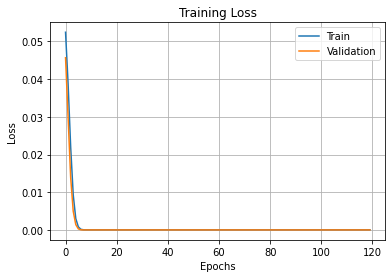

In [ ]:
# speed
plt.plot(history_s.history['loss'], label='Train')
plt.plot(history_s.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

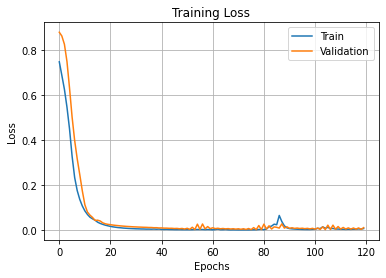

In [ ]:
# position
plt.plot(history_p.history['loss'], label='Train')
plt.plot(history_p.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# speed
# predicting on test data
prediction_speed = model_s.predict(test_features_speed)
prediction_speed

array([[0.3327715 , 0.19588982, 0.31795645, ..., 0.19520201, 0.1027801 ,
        0.29367056],
       [0.33373815, 0.19652599, 0.31867322, ..., 0.19579934, 0.10312486,
        0.29454118],
       [0.33431953, 0.19687249, 0.31917545, ..., 0.19630037, 0.10332927,
        0.29509664],
       ...,
       [0.33273837, 0.19594525, 0.31841692, ..., 0.19527905, 0.10272621,
        0.29401052],
       [0.3325958 , 0.19555633, 0.3178168 , ..., 0.1946125 , 0.10271208,
        0.29359162],
       [0.3329867 , 0.19545114, 0.31792387, ..., 0.19456774, 0.10317181,
        0.29414374]], dtype=float32)

In [ ]:
# position
# predicting on test data
prediction_pos = model_p.predict(test_features_pos)
prediction_pos

array([[0.92919403, 0.916472  , 0.98130846, ..., 0.9048776 , 0.96669513,
        0.9508892 ],
       [0.9305368 , 0.9176858 , 0.9829215 , ..., 0.90613955, 0.968111  ,
        0.9523282 ],
       [0.9318693 , 0.9188922 , 0.9845171 , ..., 0.9073822 , 0.96951455,
        0.9537605 ],
       ...,
       [1.1507418 , 1.1131929 , 1.2738036 , ..., 1.1352968 , 1.2206433 ,
        1.1754225 ],
       [1.1511457 , 1.1135569 , 1.2744378 , ..., 1.1358372 , 1.2212133 ,
        1.1757808 ],
       [1.1515508 , 1.1139228 , 1.2750692 , ..., 1.1363813 , 1.2217883 ,
        1.1761414 ]], dtype=float32)

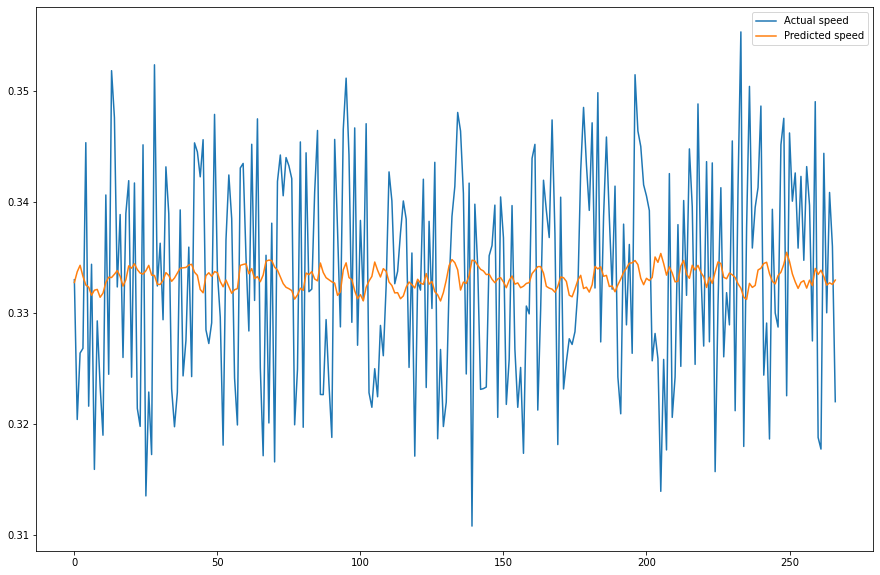

In [ ]:
# speed graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels_speed[:, 0], label='Actual speed')
plt.plot(prediction_speed[:, 0], label='Predicted speed')
plt.legend()

In [ ]:

# model_s.save('speed_lstm.h5')

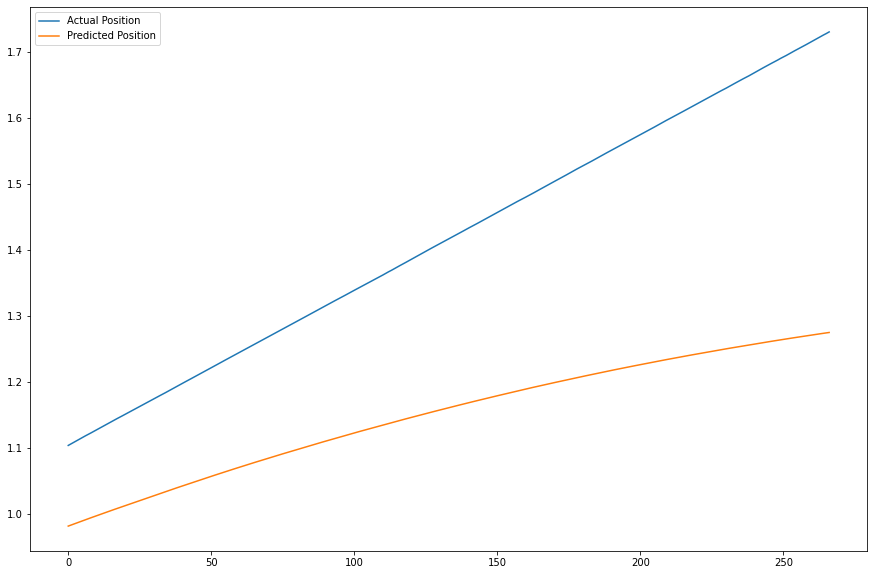

In [ ]:
# position graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels_pos[:, 2], label='Actual Position');
plt.plot(prediction_pos[:, 2], label='Predicted Position');
# plt.ylim(0.77,0.95)
plt.legend()

In [ ]:
prediction_speed[0]

array([0.3361826 , 0.1956592 , 0.31875116, 0.25440872, 0.18422003,
       0.12846518, 0.19921993, 0.19272657, 0.2778498 , 0.36094505,
       0.3007139 , 0.07457626, 0.31920362, 0.1359312 , 0.19461821,
       0.10485715, 0.29586375], dtype=float32)

In [ ]:
# taking last four timesteps of all caar to create window as 4 as required by our model and then train for nest 30 or 60 oer 100 time steps
# position
test_pos=test_df_pos[-4:]

In [ ]:
# taking last four timesteps of all caar to create window as 4 as required by our model and then train for nest 30 or 60 oer 100 time steps
# speed
test_speed=test_df_speed[-4:].to_numpy()

In [ ]:
test_speed

array([[0.33003796, 0.1818302 , 0.31632   , 0.25095796, 0.19850694,
        0.13825551, 0.19796898, 0.18909265, 0.26575184, 0.36742612,
        0.31470612, 0.07396939, 0.32035469, 0.12292367, 0.1872098 ,
        0.10732286, 0.29507061],
       [0.34088461, 0.18932166, 0.30471018, 0.25216483, 0.16846195,
        0.14179321, 0.20595662, 0.20384424, 0.28490666, 0.35778361,
        0.30629446, 0.06891625, 0.3239856 , 0.12410207, 0.17427099,
        0.11037162, 0.29731686],
       [0.33603502, 0.18853361, 0.30331652, 0.23787954, 0.181829  ,
        0.12068297, 0.19979736, 0.19067909, 0.27381624, 0.37116717,
        0.29446644, 0.06302333, 0.33308499, 0.12604665, 0.20006554,
        0.11022378, 0.31082568],
       [0.3220287 , 0.19741641, 0.33784383, 0.24268039, 0.18760013,
        0.14397219, 0.19441699, 0.19550769, 0.26340366, 0.355295  ,
        0.3103037 , 0.05780702, 0.33538976, 0.13197451, 0.18214663,
        0.1224309 , 0.28112751]])

In [ ]:
test_features_speed[0]

array([[0.33724332, 0.19866115, 0.32362542, 0.26381346, 0.17890184,
        0.13991726, 0.20693869, 0.19518992, 0.25927416, 0.34819104,
        0.30092891, 0.08838285, 0.30199699, 0.14232042, 0.20079729,
        0.09238811, 0.30466716],
       [0.32963358, 0.19600561, 0.32452507, 0.25757665, 0.17557156,
        0.11050522, 0.21536419, 0.21025568, 0.26725594, 0.36270449,
        0.29952024, 0.06022669, 0.30409101, 0.13551005, 0.18498198,
        0.12018451, 0.30301554],
       [0.3270624 , 0.2034757 , 0.29998592, 0.26781585, 0.18926726,
        0.13618664, 0.20052678, 0.18390558, 0.2670116 , 0.34475594,
        0.30052209, 0.05736996, 0.3302794 , 0.13886748, 0.20615654,
        0.111791  , 0.30722419],
       [0.33516732, 0.1811203 , 0.30592816, 0.25394745, 0.17002025,
        0.14051037, 0.21306678, 0.17814224, 0.29428665, 0.35032836,
        0.31269649, 0.08094913, 0.30646963, 0.13563718, 0.20277893,
        0.11722734, 0.30024277]])

In [ ]:
# position
p_list=[]
for i in test_pos:
    p_list.append(list(i))
p_list

[[0.9979523403787484,
  0.9979873571483553,
  0.9979742127576868,
  0.9980244230787316,
  0.9979829756295523,
  0.9978248134939094,
  0.9979390955778958,
  0.9979092526267449,
  0.9979722139760541,
  0.997936475514477,
  0.997921038636123,
  0.9982560158830643,
  0.9978624030335608,
  0.9980841726289618,
  0.9980513818840524,
  0.9977448266004587,
  0.9979406745346644],
 [0.9986620124783553,
  0.9986604284751412,
  0.9986372081282197,
  0.9987152601200393,
  0.9986254427031148,
  0.9985958201960683,
  0.998657373258522,
  0.998643248521312,
  0.998685608537462,
  0.998628402185569,
  0.9986315697351695,
  0.9988989252821042,
  0.9985716597879741,
  0.9987165032921557,
  0.9986714821523868,
  0.9984824341755827,
  0.9986399509140274],
 [0.9993507957012889,
  0.9993203575445007,
  0.9992875531100692,
  0.9993561832808755,
  0.9993081898439852,
  0.9992419151978773,
  0.9993434205304019,
  0.9993182965590615,
  0.999360655661834,
  0.9993351376193637,
  0.9993035448831051,
  0.99948025332

In [ ]:
# speed
s_list=[]
for i in test_speed:
    s_list.append(list(i))
s_list

[[0.3300379602675066,
  0.18183020467875669,
  0.3163200010387838,
  0.2509579600078106,
  0.19850693942740005,
  0.1382555106581079,
  0.19796898024195997,
  0.18909265368219816,
  0.26575183760741367,
  0.36742612365559413,
  0.31470612348246346,
  0.07396938799801493,
  0.3203546949295846,
  0.12292367387306481,
  0.18720979653315778,
  0.10732285749530167,
  0.29507061321389955],
 [0.34088460937028936,
  0.18932166143957976,
  0.30471017754710605,
  0.25216483497182524,
  0.16846195257803612,
  0.14179321086897398,
  0.20595661913929178,
  0.20384424355837596,
  0.2849066564760203,
  0.3577836140176159,
  0.3062944592327929,
  0.06891625332737841,
  0.32398560472296284,
  0.12410206537880404,
  0.17427098542555458,
  0.11037162410285124,
  0.2973168630139007],
 [0.3360350151605657,
  0.18853361185784334,
  0.30331652206432547,
  0.237879535871845,
  0.1818290026168105,
  0.12068296633859103,
  0.1997973553827785,
  0.19067908681497384,
  0.273816241403781,
  0.37116716758357776,
  

In [ ]:
#position
out_append_pos=[]
for i in range(40):
    temp=np.array(s_list).reshape(1,4,17)
    pred=model_p.predict(temp)
    # print(pred[0])
    out_append_pos.append(list(pred[0]))
    p_list.append(list(pred[0]))
    p_list.pop(0)



In [ ]:
#speed
out_append_speed=[]
for i in range(40):
    temp=np.array(s_list).reshape(1,4,17)
    pred=model_s.predict(temp)
    # print(pred[0])
    out_append_speed.append(list(pred[0]))
    s_list.append(list(pred[0]))
    s_list.pop(0)



In [ ]:
# pos
step40_pos=np.array(out_append_pos)

In [ ]:
# speed
step40_speed=np.array(out_append_speed)

In [ ]:
# pos
step40_pos.shape

NameError: ignored

In [ ]:
# speed
step40_speed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.334284,0.196139,0.318827,0.255376,0.184608,0.128897,0.198699,0.192672,0.277711,0.362001,0.301043,0.074976,0.318117,0.137298,0.195823,0.103438,0.294642
1,0.334486,0.196269,0.318962,0.255464,0.184867,0.129109,0.198890,0.192693,0.277784,0.362246,0.301174,0.074939,0.318202,0.137360,0.196080,0.103573,0.294770
2,0.335242,0.196781,0.319622,0.255924,0.185300,0.129465,0.199342,0.192976,0.278302,0.362979,0.301650,0.074890,0.318878,0.137515,0.196633,0.103675,0.295265
3,0.334566,0.196149,0.319141,0.255633,0.184799,0.129020,0.198896,0.192779,0.277709,0.362257,0.301242,0.074976,0.318296,0.137206,0.196017,0.103516,0.294780
4,0.334231,0.196319,0.319232,0.255712,0.184375,0.129127,0.198630,0.192870,0.277888,0.361878,0.301266,0.074944,0.318401,0.137405,0.196105,0.103352,0.294818
5,0.334296,0.196372,0.319283,0.255756,0.184403,0.129145,0.198655,0.192899,0.277943,0.361931,0.301309,0.074951,0.318464,0.137426,0.196137,0.103360,0.294868
6,0.334303,0.196384,0.319288,0.255767,0.184389,0.129136,0.198642,0.192903,0.277965,0.361923,0.301304,0.074957,0.318477,0.137434,0.196126,0.103352,0.294871
7,0.334152,0.196280,0.319165,0.255678,0.184287,0.129079,0.198553,0.192839,0.277877,0.361761,0.301181,0.074955,0.318343,0.137406,0.196024,0.103319,0.294757
8,0.334129,0.196265,0.319147,0.255665,0.184272,0.129074,0.198537,0.192830,0.277864,0.361729,0.301161,0.074957,0.318322,0.137403,0.196005,0.103315,0.294744
9,0.334118,0.196259,0.319136,0.255658,0.184263,0.129067,0.198526,0.192825,0.277860,0.361712,0.301149,0.074960,0.318311,0.137403,0.195992,0.103313,0.294737


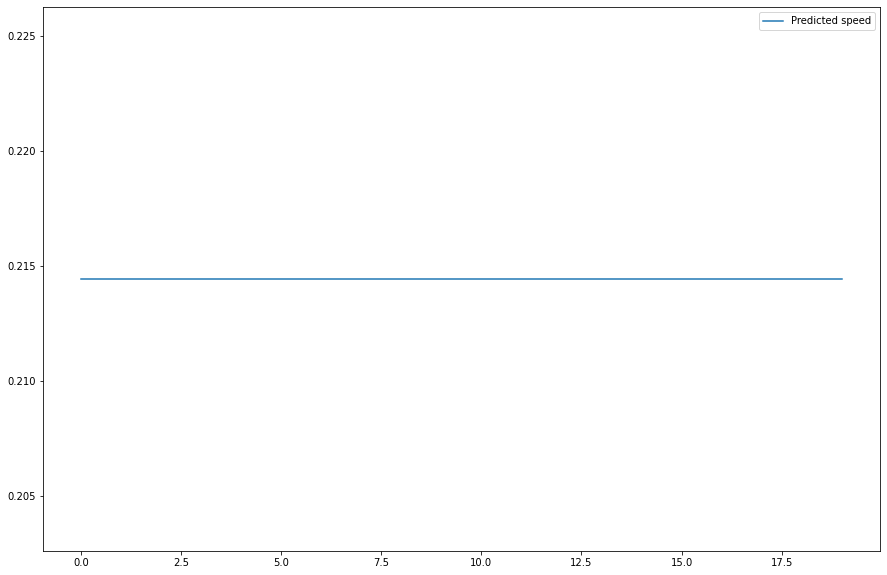

In [ ]:
# speed graph with test labels
plt.figure(figsize=(15,10))
plt.plot(step40_pos[:20, 3], label='Predicted speed')
plt.legend()

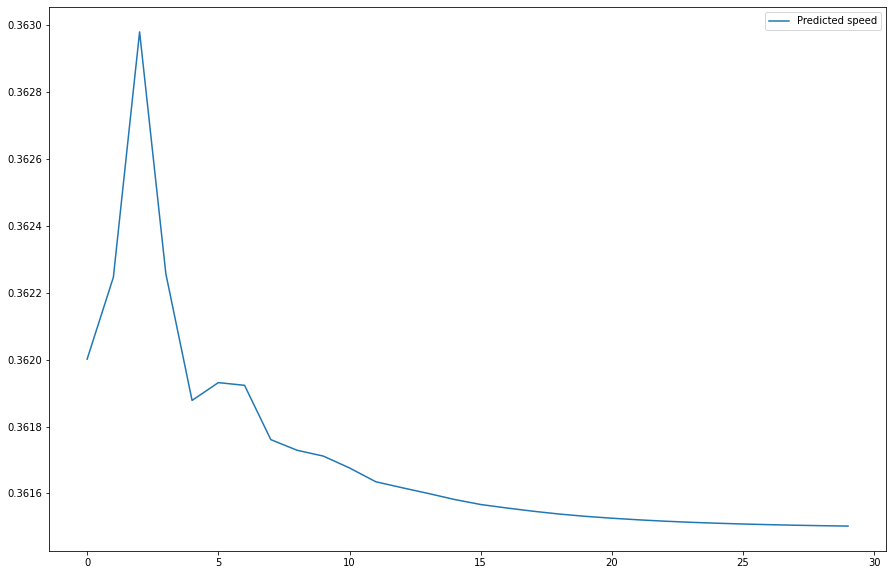

In [ ]:
    # speed graph with test labels
plt.figure(figsize=(15,10))
plt.plot(step40_speed[:30,9], label='Predicted speed')
plt.legend()

In [ ]:
step40_speed=pd.DataFrame(step40_speed)

In [ ]:
step40_inv=scale.inverse_transform(step40_speed)

In [ ]:
step40_inv.shape


(40, 17)

In [ ]:
position=df.iloc[-1,:17]

In [ ]:
# speeds for a vehicle
speed1 = step40_inv.iloc[:,0]

In [ ]:
speed1

In [ ]:
position_predicted=[]
for j in range(0,17):
    new_pos = [position[j]]

    for i in range(0,39):
        temp = round(new_pos[i] + speed1[i], 2)
        new_pos.append(temp)
    # print(new_pos)
    position_predicted.append(new_pos)
print(position_predicted)

[[18834.73, 18846.34, 18858.42, 18870.33, 18882.24, 18894.35, 18906.38, 18918.57, 18930.34, 18942.32, 18954.13, 18966.14, 18977.77, 18989.69, 19001.62, 19013.76, 19025.96, 19038.06, 19050.16, 19062.41, 19074.65, 19087.04, 19099.27, 19111.72, 19124.01, 19136.18, 19148.56, 19160.79, 19173.17, 19185.51, 19197.97, 19210.29, 19222.71, 19235.11, 19247.64, 19260.24, 19272.59, 19284.94, 19297.16, 19309.54], [11015.41, 11027.02, 11039.1, 11051.01, 11062.92, 11075.03, 11087.06, 11099.25, 11111.02, 11123.0, 11134.81, 11146.82, 11158.45, 11170.37, 11182.3, 11194.44, 11206.64, 11218.74, 11230.84, 11243.09, 11255.33, 11267.72, 11279.95, 11292.4, 11304.69, 11316.86, 11329.24, 11341.47, 11353.85, 11366.19, 11378.65, 11390.97, 11403.39, 11415.79, 11428.32, 11440.92, 11453.27, 11465.62, 11477.84, 11490.22], [17577.55, 17589.16, 17601.24, 17613.15, 17625.06, 17637.17, 17649.2, 17661.39, 17673.16, 17685.14, 17696.95, 17708.96, 17720.59, 17732.51, 17744.44, 17756.58, 17768.78, 17780.88, 17792.98, 17805.23,

In [ ]:
prediction_num=np.array(position_predicted)

In [ ]:
pred_pos_df=pd.DataFrame(prediction_num)

In [ ]:
pred_pos_df=pred_pos_df.T
pred_pos_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,18834.73,11015.41,17577.55,13923.00,9985.92,6995.62,10877.35,10522.87,15600.91,20134.59,16781.60,4172.85,17682.90,7599.82,10846.83,5771.03,16302.91
1,18846.34,11027.02,17589.16,13934.61,9997.53,7007.23,10888.96,10534.48,15612.52,20146.20,16793.21,4184.46,17694.51,7611.43,10858.44,5782.64,16314.52
2,18858.42,11039.10,17601.24,13946.69,10009.61,7019.31,10901.04,10546.56,15624.60,20158.28,16805.29,4196.54,17706.59,7623.51,10870.52,5794.72,16326.60
3,18870.33,11051.01,17613.15,13958.60,10021.52,7031.22,10912.95,10558.47,15636.51,20170.19,16817.20,4208.45,17718.50,7635.42,10882.43,5806.63,16338.51
4,18882.24,11062.92,17625.06,13970.51,10033.43,7043.13,10924.86,10570.38,15648.42,20182.10,16829.11,4220.36,17730.41,7647.33,10894.34,5818.54,16350.42
5,18894.35,11075.03,17637.17,13982.62,10045.54,7055.24,10936.97,10582.49,15660.53,20194.21,16841.22,4232.47,17742.52,7659.44,10906.45,5830.65,16362.53
6,18906.38,11087.06,17649.20,13994.65,10057.57,7067.27,10949.00,10594.52,15672.56,20206.24,16853.25,4244.50,17754.55,7671.47,10918.48,5842.68,16374.56
7,18918.57,11099.25,17661.39,14006.84,10069.76,7079.46,10961.19,10606.71,15684.75,20218.43,16865.44,4256.69,17766.74,7683.66,10930.67,5854.87,16386.75
8,18930.34,11111.02,17673.16,14018.61,10081.53,7091.23,10972.96,10618.48,15696.52,20230.20,16877.21,4268.46,17778.51,7695.43,10942.44,5866.64,16398.52
9,18942.32,11123.00,17685.14,14030.59,10093.51,7103.21,10984.94,10630.46,15708.50,20242.18,16889.19,4280.44,17790.49,7707.41,10954.42,5878.62,16410.50


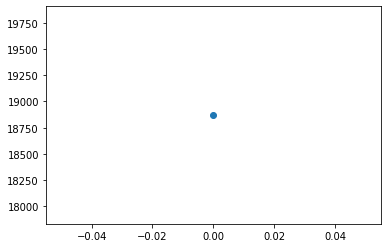

In [ ]:
plt.scatter(range(1),pred_pos_df.iloc[3,0])

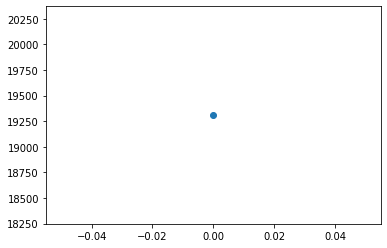

In [ ]:
plt.scatter(range(1),pred_pos_df.iloc[39,0])

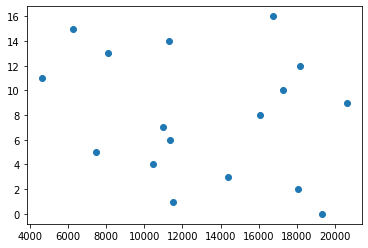

In [ ]:
plt.scatter(pred_pos_df.iloc[39,:],range(17))

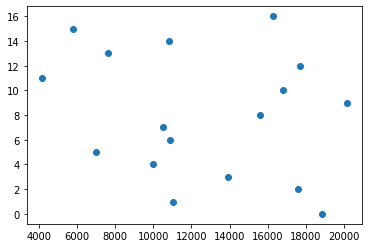

In [ ]:
plt.scatter(pred_pos_df.iloc[0,:],range(17))